In [1]:
import sqlite3

conn = sqlite3.connect('sales_data.db')
cursor = conn.cursor()

cursor.execute('''
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY,
    product TEXT,
    quantity INTEGER,
    price REAL
)
''')

print("Table created.")

Table created.


In [2]:
sales_data = [
    ('Apple', 10, 5),
    ('Banana', 5, 2),
    ('Orange', 8, 3),
    ('Apple', 6, 5),
    ('Banana', 3, 2),
    ('Orange', 10, 3)]

sales_data

[('Apple', 10, 5),
 ('Banana', 5, 2),
 ('Orange', 8, 3),
 ('Apple', 6, 5),
 ('Banana', 3, 2),
 ('Orange', 10, 3)]

In [3]:
cursor.executemany('INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)', sales_data)
conn.commit()
conn.close()

  product  total_qty  revenue
0   Apple         48     96.0
1  Banana         24     19.2
2  Orange         54     64.8


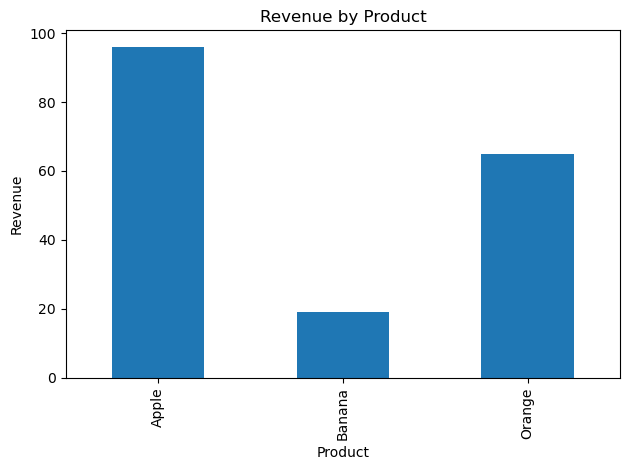

In [4]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

conn = sqlite3.connect('sales_data.db')

query = '''
SELECT product,
       SUM(quantity) AS total_qty,
       SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
'''

df = pd.read_sql_query(query, conn)
conn.close()

print(df)

df.plot(kind='bar', x='product', y='revenue', legend=False)
plt.title('Revenue by Product')
plt.xlabel('Product')
plt.ylabel('Revenue')
plt.tight_layout()
plt.savefig("sales_chart.png")
plt.show()
